# <center> <u> Feature Selection </u> </center>

<h2>What's the Purpose of Feature Selection</h2>
<p>Many learning algorithms perform poorly on high-dimensional data. This is known as the <b>curse of dimensionality</b>
    <p>There are other reasons we may wish to reduce the number of features including:
        <p>1. Reducing computational cost
            <p>2. Reducing the cost associated with data collection
                <p>3. Improving Interpretability
                    
Reference for entire topic-

https://www.youtube.com/watch?v=EqLBAmtKMnQ

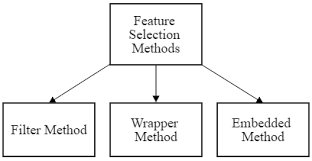

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt


## 1.Filter Methods:



Filter method applies a statistical measure to assign a scoring to each feature.Then we can decide to keep or remove those features based on those scores. The methods are often univariate and consider the feature independently, or with regard to the dependent variable.

In this section we will cover below approaches:

1. `Missing Value Ratio Threshold`
2. `Variance Threshold`
3. $Chi^2$ Test
4. `Anova Test`

## (a) Missing Value Ratio Threshold

In [ ]:
# create a data frame named diabetes and load the csv file
diabetes = pd.read_csv('8A-diabetes.csv')
#print the head 
diabetes.head()

We know that some features can not be zero(e.g. a person's blood pressure can not be 0) hence we will impute zeros with nan value in these features.

Reference to impute: https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.replace.html

In [ ]:
for col in diabetes.columns:
    val_cnt = diabetes[col].value_counts()
    print(val_cnt)

In [ ]:
#Glucose BloodPressure, SkinThickness, Insulin, and BMI features cannot be zero ,we will impute zeros with nan value in these features.
col_with_o = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
def impute_0(df):
    for col in diabetes.columns:
        if col in col_with_o:
            df[col].replace(0,np.nan,inplace=True)
        
impute_0(diabetes)


In [ ]:
#display the no of null values in each feature
diabetes.isnull().sum()

Now let's see for each feature what is the percentage of having missing values.

In [ ]:
diabetes.shape

In [ ]:
#percentage of missing values

for col in col_with_o:
    null_per = (diabetes[col].isnull().sum()/diabetes.shape[0])*100
    print('--'*20)
    print(f'percentage of missing values for {col} is: {null_per}')

Hey can you see that a large number of data missing in SkinThickness and Insulin.

Here we will keep only those features which are having missing data less than 10% as our threshold.

Reference to check methods for dropping nan in pandas- https://www.youtube.com/watch?v=57vFbsiZYHg

You can also check its document official: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [ ]:
#we are keep only those features which are having missing data less than 10% 
diabetes_missing_value_threshold= diabetes.dropna(thresh=int(diabetes.shape[0]*.9),axis=1)

# print diabetes_missing_value_threshold
diabetes_missing_value_threshold

In [ ]:
for col in diabetes_missing_value_threshold:
    null_per = (diabetes_missing_value_threshold[col].isnull().sum()/diabetes.shape[0])*100
    print('--'*20)
    print(f'percentage of missing values for {col} is: {null_per}')

Let's now Seperate the data diabetes_missing_value_threshold into features and labels 

Hey buddy! label is something which is dependent on other features for its outcome. You can also called it as our Target variable which we predict using ML algorithms.

Can you think which column would be considered as label.


In [ ]:

diabetes_missing_value_threshold_features = diabetes_missing_value_threshold.drop('Outcome',axis=1)

diabetes_missing_value_threshold_label= diabetes_missing_value_threshold['Outcome']


In [ ]:
#print diabetes_missing_value_threshold_features

diabetes_missing_value_threshold_features

In [ ]:
#print diabetes_missing_value_threshold_label
diabetes_missing_value_threshold_label

## (b) Variance Threshold

`If the variance is low or close to zero, then a feature is approximately constant and will not improve performance of the model. In that case, it should be removed.`

Variance will also be very low for a feature if only a handful of observations of that feature differ from a constant value.


Reference-
https://www.youtube.com/watch?v=uMlU2JaiOd8

In [ ]:
# load the csv to dataframe name "diabetes" and print the head values
diabetes = pd.read_csv('8B-diabetes_cleaned.csv')

# display diabetes.head()
diabetes.head()

In [ ]:
# seperate the features and the target as x and y 
x = diabetes.drop('Outcome',axis=1)
y = diabetes['Outcome']

If you have seen the video then Krish must have told you to use `sklearn library to calculate variance threshold`. But `we will use var function to calculate our variance so that you understand the concept from base`. 

In [ ]:
# Return  the variance for X along the specified axis=0.
x.var(axis=0)

    Hey smarty! did you see that DiabetesPedigreeFunction variance is less so it brings almost no information because it is (almost) constant , this can be a justification to remove DiabetesPedigreeFunction column but before considering this we should scale these features because they are of different scales.
    
Reference for minmax scaling: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

Lets use sklearn minmax scaler here.


In [ ]:
# import minmax_scale
from sklearn.preprocessing import minmax_scale


# use minmax scale with feature_range=(0,10) and columns=X.columns,to scale the features of dataframe and store them into X_scaled_df 
X_scaled_df = pd.DataFrame(minmax_scale(x,feature_range=(0,10)),columns=x.columns)



Wait a minute! whats minmax scaling? also called [Normalization]

It is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]

hey hey heyieeee! Fun fact time:

There is another scaling method called StandardScaler which follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

Cool right? :)

In [ ]:
# return X_scaled_df
X_scaled_df

In [ ]:
# Again return  the variance for X along the specified axis=0 to check the scales after using minmax scaler.
X_scaled_df.var(axis=0)


Now again you can check the previous video:https://www.youtube.com/watch?v=uMlU2JaiOd8

In [ ]:
# import variancethreshold
from sklearn.feature_selection import VarianceThreshold

# set threshold=1 and define it to variable select_features
fetrs = VarianceThreshold(threshold=1.0)

   Impliment fit_transform on select_features passing X_scaled_df into it and save this result in variable X_variance_threshold_df


In [ ]:
X_variance_threshold_df= fetrs.fit_transform(X_scaled_df)


`Were you thinking of fit_transform?` We are here to help you understand

`fit_transform() is used on the training data so that we can scale training data and also learn scaling parameters of that data.` Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data

Don't worry you will get lot of challenges to use these things in our other assignments

In [ ]:
#print X_variance_threshold_df
X_variance_threshold_df

In [ ]:
#Convert X_variance_threshold_df into dataframe
X_variance_threshold_df = pd.DataFrame(X_variance_threshold_df)

In [ ]:
# print of head values of X_variance_threshold_df 
X_variance_threshold_df.head()

Below mentioned is the function get_selected_features for returning selected_features to be used further.

Warning ;)
If we have provided you a readymade function, don't just use it but understand it too.

In [ ]:
def get_selected_features(raw_df,processed_df):
    
    selected_features=[]
    for i in range(len(processed_df.columns)):
        for j in range(len(raw_df.columns)):
            if (processed_df.iloc[:,i].equals(raw_df.iloc[:,j])):
                selected_features.append(raw_df.columns[j])
    return selected_features

In [ ]:
# pass the X_scaled_df as raw_df and X_variance_threshold_df as processed_df inside get_selected_features function
selected_features= get_selected_features(X_scaled_df,X_variance_threshold_df)

# print selected_features
selected_features


Super! you can see SkinThickness feature is not selected as its variance is less.

Lets give column names to our X_variance_threshold_df

In [ ]:
# define selected_features as columns and save it in variabe named X_variance_threshold_df
X_variance_threshold_df.columns = selected_features
#print X_variance_threshold_df
X_variance_threshold_df

## (c) Chi-Squared statistical test (SelectKBest)

Chi2 is a measure of dependency between two variables. It gives us a goodness of fit measure because it measures how well an observed distribution of a particular feature fits with the distribution that is expected if two features are independent.

Note: hi-Square is to be used when the feature is categorical, the target variable is any way can be thought as categorical. It measures the degree of association between two categorical variables. If both are numeric, we can use Pearson’s product-moment correlation, and if the attribute is numerical and there are two classes we can use a t-test if more than two classes we can use ANOVA.It may be noted Chi-Square can be used for the numerical variable as well after it is suitably discretized.


Scikit-Learn offers a feature selection estimator named SelectKBest which select K numbers of features based on the statistical analysis.

Reference link: https://chrisalbon.com/machine_learning/feature_selection/chi-squared_for_feature_selection/

The below mentioned function generate_feature_scores_df is used to get feature score for using it in  Chi-Squared statistical test explained below

In [ ]:
def generate_feature_scores_df(X,Score):
    feature_score=pd.DataFrame()
    for i in range(X.shape[1]):
        new =pd.DataFrame({"Features":X.columns[i],"Score":Score[i]},index=[i])
        feature_score=pd.concat([feature_score,new])
    return feature_score

----

In [ ]:
# create a data frame named diabetes and load the csv file again
diabetes = pd.read_csv('8C-diabetes.csv')


In [ ]:
diabetes.head(2)

In [ ]:
# assign features to X variable and 'outcome' to y variable from the dataframe diabetes

X = diabetes.drop('Outcome',axis=1)
y = diabetes.Outcome

In [ ]:
#import chi2 and SelectKBest
from sklearn.feature_selection import chi2,SelectKBest


In [ ]:
# converting data cast to a float type.
X = X.astype(np.float64)


Lets use SelectKBest to calculate the best feature score. Use Chi2 as Score Function and no.of feature i.e. k as 4


In [ ]:
# Initialise SelectKBest with above parameters 
chi2_test= SelectKBest(score_func=chi2,k=4)

# fit it with X and Y
chi2_model= chi2_test.fit(X,y)


In [ ]:
#print the scores of chi2_model
chi2_model.scores_


In [ ]:
# use generate_feature_scores_df function to get features and their respective scores passing X and chi2_model.scores_ as paramter
feature_score_df= generate_feature_scores_df(X,chi2_model.scores_)

# return feature_score_df
feature_score_df


Did you see the features and corresponding chi square scores? This is so easy right, higher the score better the feature. Just like higher the marks in assignment better the student of ours. 

In [ ]:
#Lets get X with selected features of chi2_model using tranform function so we will have X_new
X_new= chi2_model.transform(X)


whaaaat! `tranform()? , how is it different from fit_transform.`You know buddy fit() can also confuse you. Hey you inquisitive learner we will tell you the difference.

* `fit() function calculates values of these parameters`
* `transform function applies values of parameters on actual data and gives normalized value` * `fit_transform() function performs both in same step`. Note that the same value is got whether we perform in 2 steps or in a single step.

for more info on this refer: https://www.youtube.com/watch?v=BotYLBQfd5M

In [ ]:
# Convert X_new into a dataframe

X_new= pd.DataFrame(X_new)

In [ ]:
#repeat the previous steps of calling get_selected_features function( pass X and X_new as score in the function)
selected_features= get_selected_features(X,X_new)

# return selected_features
selected_features

Let have X with all features given in list selected_features and save this dataframe in variable chi2_best_features

In [ ]:
chi2_best_features = X[selected_features]

# print chi2_best_features.head()
chi2_best_features.head()

As you can see chi-squared test helps us to select  important independent features out of the original features that have the strongest relationship with the target feature.

You did it well!

As you can see chi-squared test helps us to select  important independent features out of the original features that have the strongest relationship with the target feature.

You did it well!

Now many learners have this confusion below on two questions frequently on this section:-
1. How can the χ2-test work for feature selection for continuous variables here (since Glucose, Insulin, BMI and Age are continues and only target is categorical)?
2. Is it a problem that this test is scale dependent?



Mostly we get confused on the data itself (which can be continuous) with the fact that when you talk about data, you actually talk about samples, which are discrete.

The χ2 test (in wikipedia and the model selection by χ2 criterion) is a test to check for independence of sampled data. I.e. when you have two (or more) of sources of the data (i.e. different features), and you want to select only features that are mutually independent, you can test it by rejecting the Null hypothesis (i.e. data samples are dependant) if the probability to encounter such a sample (under the Null hypothesis), i.e. the p value, is smaller than some threshold value (e.g., p < 0.05)

So now for above two questions,

1. The χ2 test do work only on categorical data, as you must count the occurences of the samples in each category to use it, but as I've mentioned above, when you use it, you actually have samples in hand, so one thing you can do is to divide your samples into categories based on thresholds (e.g., cat1:x∈[th1<x<th2],cat2:x∈[th2<x<th3], etc.) and count all the samples that fall into each category.
2. As for the scales - you are obviously must use the same scales when you discretize your samples, otherwise it won't make any sense, but when you conduct the χ2 test itself, you are dealing with counts, so they won't have any scales anyway.


Hope this clears your doubt. 

Hence you can see that in sklearn library also example of Chi2 test is given on numerical features i.e. iris data.

## (d) Anova-F Test

The F-value scores examine the varaiance by grouping the numerical feature by the target vector, the means for each group are significantly different.

References:
1. https://www.youtube.com/watch?v=9zrQ_c5RZkI


In [ ]:
#import libraries
from sklearn.feature_selection import f_classif,SelectPercentile


# Initialise SelectPercentile function with parameters f_classif and percentile as 80
Anova_test= SelectPercentile(f_classif,percentile=80)



#Fit the above object to the features and target i.e X and Y
Anova_model= Anova_test.fit(X,y)

here you have used f_classif for Anova-F test. To know more about this test you can check this artical.

https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476



In [ ]:
# return scores of anova model
Anova_model.scores_


In [ ]:
# use generate_feature_scores_df function to get features and their respective scores by passing X and Anova_model.scores_ as score in function 

feature_scores_df= generate_feature_scores_df(X,Anova_model.scores_)

# print feature_scores_df
feature_scores_df


In [ ]:
# Get all supported columns values in Anova_model with indices=True
cols = Anova_model.get_support(indices=True)
# Reduce X to the selected features of anova model using tranform 

X_new = X.iloc[:,cols]


In [ ]:
#print X_new.head()
X_new.head()


Hey brighty! Hope you learned to implement Anova F-test method for feature selection. It has selected 6 best features as you can see in above output

# 2. Wrapper Methods


Wrapper methods are used to select a set of features by preparing where different combinations of features, then each combination is evaluated and compared to other combinations.Next a predictive model is used to assign a score based on model accuracy and to evaluate the combinations of these features.

In [ ]:
# load and read the diabetes.csv using pandas and print the head values

diabetes = pd.read_csv('8C-diabetes.csv')
diabetes.head()


In [ ]:
# assign features to X and target 'outcome' to Y variable(Think why the 'outcome' column is taken as the target)
X= diabetes.drop('Outcome',axis=True)

Y= diabetes.Outcome

#return X,Y

X,y

## (a) Recursive Feature Elemination

Recursive Feature Elimination selects features by recursively considering smaller subsets of features by pruning the least important feature at each step. Here models are created iteartively and in each iteration it determines the best and worst performing features and this process continues until all the features are explored.Next ranking is given on eah feature based on their elimination orde. In the worst case, if a dataset contains N number of features RFE will do a greedy search for $N^2$ combinations of features.


reference video: https://www.youtube.com/watch?v=MYnxxRoPiwI

Note: the video is using random forest classifier, but we are going to use logistic regression as our model.

In [ ]:
# import RFE and LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression as lor


In [ ]:
# Initialise model variable with LogisticRegression function with solver = 'liblinear'
model= lor(solver='liblinear')

# rfe variable has RFE instance with should have model and n_features_to_select=4 as parameters

rfe= RFE(model,n_features_to_select=4)


In [ ]:
# fit rfe with X and Y

fit= rfe.fit(X,y)


In [ ]:
print('Number of selected features',fit.n_features_)
print('Selected Features',fit.support_)
print('Feature rankings',fit.ranking_)

In [ ]:
# use below function to get ranks of all the features
def feature_ranks(X,Rank,Support):
    feature_rank=pd.DataFrame()
    for i in range(X.shape[1]):
        new =pd.DataFrame({"Features":X.columns[i],"Rank":Rank[i],'Selected':Support[i]},index=[i])
        feature_rank=pd.concat([feature_rank,new])
    return feature_rank



In [ ]:
#Get all feature's ranks using feature_ranks function with suitable parameters. Sotre it in variable called feature_rank_df
feature_rank_df= feature_ranks(X,fit.ranking_,fit.support_)

# print feature_rank_df
feature_rank_df


We can see there are four features with rank 1 ,RFE states that these are the most significant features.

In [ ]:
# filter feature_rank_df  with selected column values as True and save result in variable called recursive_feature_names 
recursive_feature_names= feature_rank_df[feature_rank_df['Selected']==True]

# print recursive_feature_names
recursive_feature_names


In [ ]:
# finally get dataframe X with all the features selected by RFE and store this result in variable called RFE_selected_features
RFE_selected_features= X[recursive_feature_names['Features'].values]

# print RFE head()
RFE_selected_features.head()


We recommend you to watch this video to know about working of RFE:  https://www.youtube.com/watch?v=Yo1vYRdJ95k

# 3. Embedded Method using random forest



Reference: https://www.youtube.com/watch?v=em4OFr-4C34

Feature selection using Random forest comes under the category of Embedded methods. Embedded methods combine the qualities of filter and wrapper methods. They are implemented by algorithms that have their own built-in feature selection methods. Some of the benefits of embedded methods are :
1. They are highly accurate.
2. They generalize better.
3. They are interpretable

In [ ]:
#Importing libraries RandomForestClassifier and SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [ ]:
# load the csv file using pandas and print the head values
diabetes = pd.read_csv('8C-diabetes.csv')

# print diabetes.head()
diabetes.head()


In all feature selection procedures, it is a good practice to select the features by examining only the training set. This is to avoid overfitting.
So considering we have a train and a test dataset. We select the features from the train set and then transfer the changes to the test set later

In [ ]:
# assign features to X and target 'outcome' to Y(Think why the 'outcome' column is taken as the target)
X = diabetes.drop('Outcome',axis=True)

Y = diabetes.Outcome


In [ ]:
# import test_train_split module
from sklearn.model_selection import train_test_split

# splitting of dataset(test_size=0.3)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)


Here We will do the model fitting and feature selection altogether in one line of code.

Firstly, specify the random forest instance, indicating the number of trees.

Then use selectFromModel object from sklearn to automatically select the features. Simple right?. Don't worry trust your code. It helps.

Reference link to use selectFromModel: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

In [ ]:
#create an instance of Select from Model. Pass an object of Random Forest Classifier with n_estimators=100 as argument. 
sel = SelectFromModel(RandomForestClassifier(n_estimators=100))

# fit sel on training data
sel.fit(X_train,y_train)


SelectFromModel will select those features which importance is greater than the mean importance of all the features by default, but we can alter this threshold if we want.

 To see which features are important we can use get_support method on the fitted model.

In [ ]:
# Using sel.get_support() print the boolean values for the features selected. 
sel.get_support()


In [ ]:
#make a list named selected_feat with all columns which are True
selected_feat= X_train.columns[(sel.get_support())]

# print length of selected_feat
len(selected_feat)

In [ ]:
# Print selected_feat
selected_feat

Well done Champ!. Let us impliment SelectFromModel using LinearSVC model also

## Feature selection using SelectFromModel


SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or featureimportances attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or featureimportances values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”.

Lets use selectfrommodel again with LinearSVC

In [ ]:
# import LinearSVC 
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel


In [ ]:
#Use SelectFromModel with LinearSVC() as its parameter and save it in variable 'm'

m = SelectFromModel(LinearSVC())

#fit m with X and Y
m.fit(X,Y)


In [ ]:
#make a list named selected_feat with all columns which are supported

selected_feat= X_train.columns[(m.get_support())]

print(selected_feat)

 # 4. Handling Multicollinearity with VIF


Multicollinearity refers to a situation in which more than two explanatory variables in a multiple regression model are highly linearly related. We have perfect multicollinearity if, for example as in the equation above, the correlation between two independent variables is equal to 1 or −1.

Variance inflation factor measures how much the behavior (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables.

VIF has big defination but for now understand that:-
Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables

Reference: https://www.youtube.com/watch?v=6JpmgzCAusI

In [ ]:
#load and read the diabetes_cleaned.csv file using pandas and print the head values

dia_df= pd.read_csv('8B-diabetes_cleaned.csv')
dia_df.head()


In [ ]:
# describe the dataframe using .describe()
dia_df.describe()


As we can see range of these features are very different that means they all are in different scales so lets standardize the features using sklearn's preprocessing scale function.

Reference doc: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [ ]:
from sklearn import preprocessing

#iterate over all features in dia_df and scale
for col in dia_df:
    dia_df[[col]] = preprocessing.scale(dia_df[[col]].astype('float64'))


In [ ]:
# describe dataframe using .describe()
dia_df.describe()


In [ ]:
#import variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# assign features to X and target to Y 
X = dia_df.drop('Outcome',axis=1)
Y = dia_df.Outcome

# split the data to test and train with test_size=0.2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=108)


In [ ]:
#assign an empty dataframe to variable vif
vif= pd.DataFrame()

# make a new column 'VIF Factor' in vif dataframe and calculate the variance_inflation_factor for each X 
vif['VIF Factor']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


In [ ]:
# define vif['Features'] with columns names in X

vif['Features']= X.columns

In [ ]:
#  round off all the decimal values in the dataframe to 2 decimal places for VIF dataframe and print it.
vif.round(2)


* VIF = 1: Not correlated
* VIF =1-5: Moderately correlated
* VIF >5: Highly correlated

Glucose, Insulin, and Age are having large VIF scores, so lets drop it.



In [ ]:
# according to above observation , drop  'Glucose', 'Insulin' and 'Age' from X

X= X.drop(['Glucose','Insulin','Age'],axis=1)


Now again we calculate the VIF for the rest of the features

Again repeat the previous steps to assign an empty dataframe() to vif and make a new column 'VIF Factor' and calculate the variance_inflation_factorfor each X 


In [ ]:
#code here
vif = pd.DataFrame()
vif['VIF Factor']= [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]


In [ ]:
X.columns

In [ ]:
#define vif['Features'] as columns of X and return vif with round off to 2 decimal places
vif['Features'] = X.columns
vif.round(2)


So now colinearity of features has been reduced using VIF.

The need to fix multicollinearity depends primarily on the below reasons:

1. When you care more about how much each individual feature rather than a group of features affects the target variable, then removing multicollinearity may be a good option
2. If multicollinearity is not present in the features you are interested in, then multicollinearity may not be a problem.

------------------------------